## Importaing Dependensies

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt 
from datetime import datetime
import imblearn

### Loading Dataset

In [2]:
df = pd.read_csv('car_evaluation.csv')

In [3]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [4]:
df.isna().sum()

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64

In [5]:
#Lablelling Columns

df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [6]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [8]:
#Finding Unique Value count of Target Column

df['class'].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [9]:
df.persons.value_counts()

4       576
more    576
2       575
Name: persons, dtype: int64

In [10]:
df.doors.value_counts()

3        432
5more    432
4        432
2        431
Name: doors, dtype: int64

### One-hot-encoding the Dataset

In [11]:
df_copy = pd.get_dummies(df)

<AxesSubplot:>

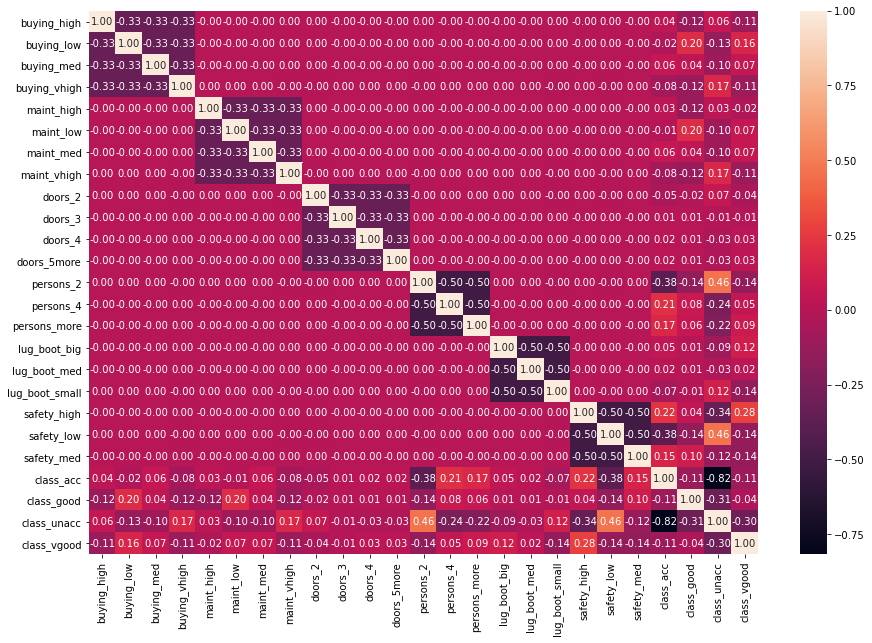

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(df_copy.corr(),annot=True,fmt='.2f')

<AxesSubplot:>

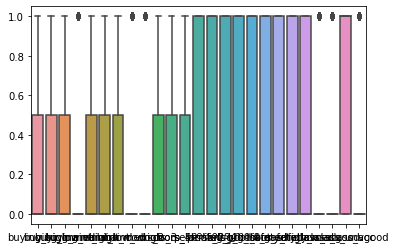

In [13]:
sns.boxplot(data= df_copy)

### changing the label name in class column 

In [14]:
df['class'].replace({'unacc':0,'acc':1,'good':2,'vgood':3},inplace=True)

In [15]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,0
1,vhigh,vhigh,2,2,small,high,0
2,vhigh,vhigh,2,2,med,low,0
3,vhigh,vhigh,2,2,med,med,0
4,vhigh,vhigh,2,2,med,high,0


<AxesSubplot:>

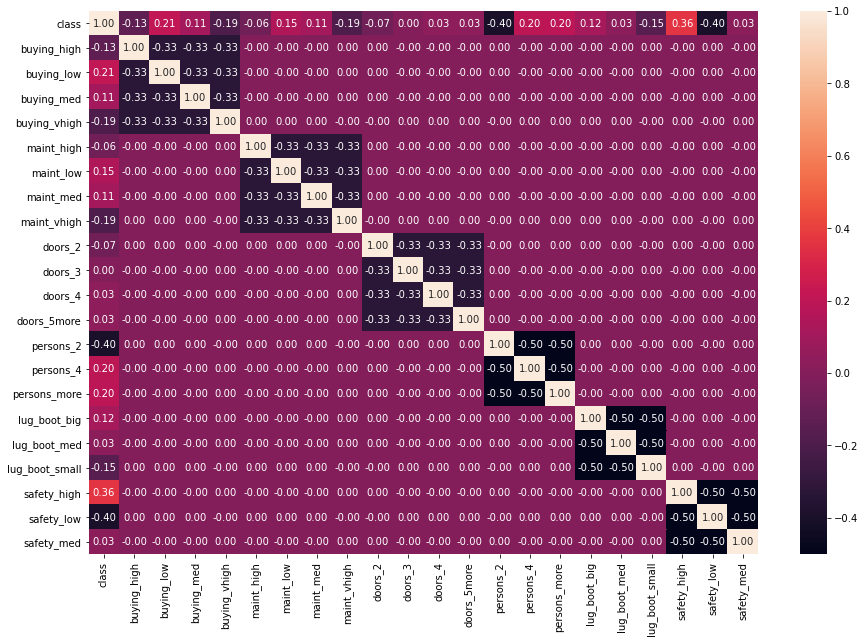

In [16]:
df_copy = pd.get_dummies(df)
plt.figure(figsize=(15,10))
sns.heatmap(df_copy.corr(),annot=True,fmt='.2f')

### Spliting Response and Target Columns

In [23]:
y = df['class']
x = df.drop(['class'],axis=1)

print(f'Shape of the X is {x.shape}')
print(f'Shape of the Y is {y.shape}')

Shape of the X is (1727, 6)
Shape of the Y is (1727,)


In [26]:
#Do one-hot-encoding on X
x = pd.get_dummies(x)

In [27]:
x

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,0,1
1,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
3,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
4,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
1723,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0
1724,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,1,0,0,0,1,0
1725,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1


In [31]:
from sklearn.model_selection import train_test_split as tts

x_train, x_test, y_train, y_test = tts(x, y, test_size=0.2, random_state=1 )

### Importing DecesionTreeClassifier from SkLearn

In [28]:
from sklearn.tree import DecisionTreeClassifier as dtree

In [29]:
ctree = dtree(max_depth=10,criterion='entropy')

In [32]:
ctree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [33]:
from sklearn import tree

[Text(692.2281976744187, 518.8909090909091, 'X[19] <= 0.5\nentropy = 1.188\nsamples = 1381\nvalue = [970, 311, 56, 44]'),
 Text(679.2514534883721, 469.4727272727273, 'X[12] <= 0.5\nentropy = 1.462\nsamples = 913\nvalue = [502, 311, 56, 44]'),
 Text(666.2747093023256, 420.05454545454546, 'X[1] <= 0.5\nentropy = 1.613\nsamples = 606\nvalue = [195, 311, 56, 44]'),
 Text(341.4505813953488, 370.6363636363636, 'X[2] <= 0.5\nentropy = 1.358\nsamples = 453\nvalue = [185, 236, 17, 15]'),
 Text(171.9418604651163, 321.21818181818185, 'X[7] <= 0.5\nentropy = 0.995\nsamples = 301\nvalue = [163, 138, 0, 0]'),
 Text(158.96511627906978, 271.8, 'X[18] <= 0.5\nentropy = 0.966\nsamples = 227\nvalue = [89, 138, 0, 0]'),
 Text(110.30232558139535, 222.38181818181818, 'X[17] <= 0.5\nentropy = 0.983\nsamples = 111\nvalue = [64, 47, 0, 0]'),
 Text(97.32558139534883, 172.96363636363634, 'X[8] <= 0.5\nentropy = 0.913\nsamples = 70\nvalue = [23, 47, 0, 0]'),
 Text(51.906976744186046, 123.54545454545456, 'X[3] <= 

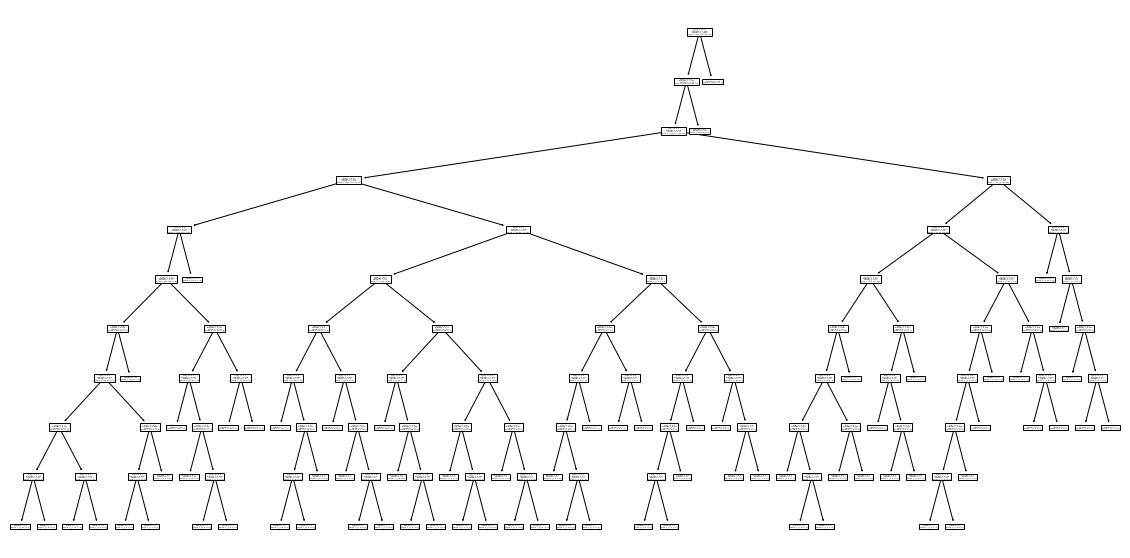

In [34]:
plt.figure(figsize=(20,10))
tree.plot_tree(ctree.fit(x_train,y_train))

### Provide Prediction

In [37]:
preds = ctree.predict(x_train)
train_acc = sum(preds == y_train)/len(preds)*100

print(f'Train Accuracy is ----------> {train_acc}')

Train Accuracy is ----------> 99.20347574221579


In [38]:
preds = ctree.predict(x_test)
test_acc = sum(preds == y_test)/len(preds)*100

print(f'Train Accuracy is ----------> {test_acc}')

Train Accuracy is ----------> 95.95375722543352
